In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)   # Data Cleaning

In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [9]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [10]:
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtype

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

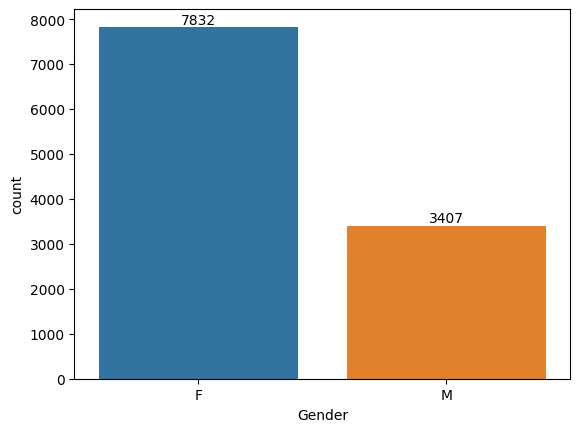

In [13]:
# Plotting a bar chart for gender and its count

ax = sns.countplot(x='Gender',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

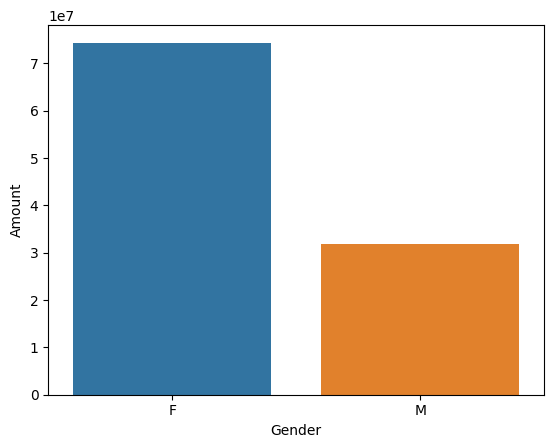

In [14]:
m1 = df.groupby(['Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=m1, hue='Gender')

From the above graphs, we can see that most of the buyers are female and they also have higher purchasing powers compared to the males.

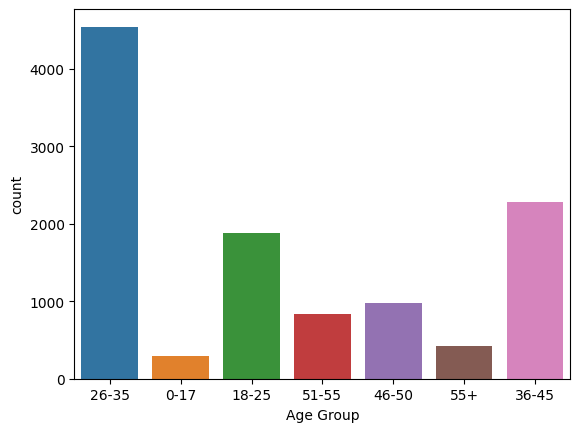

In [15]:
bx = sns.countplot(x='Age Group',data=df, hue='Age Group')

for bars in ax.containers:
    ax.bar_label(bars)

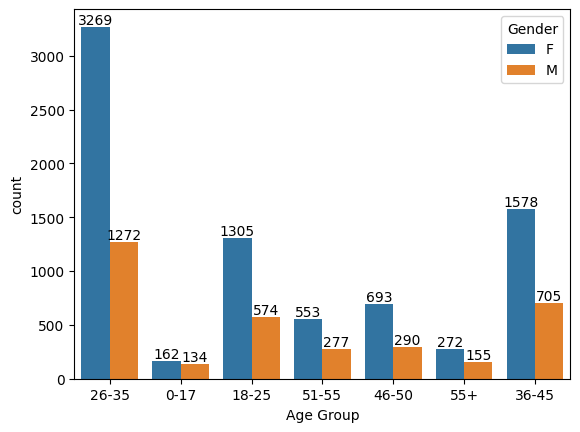

In [16]:
bx1 = sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in bx1.containers:
    bx1.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

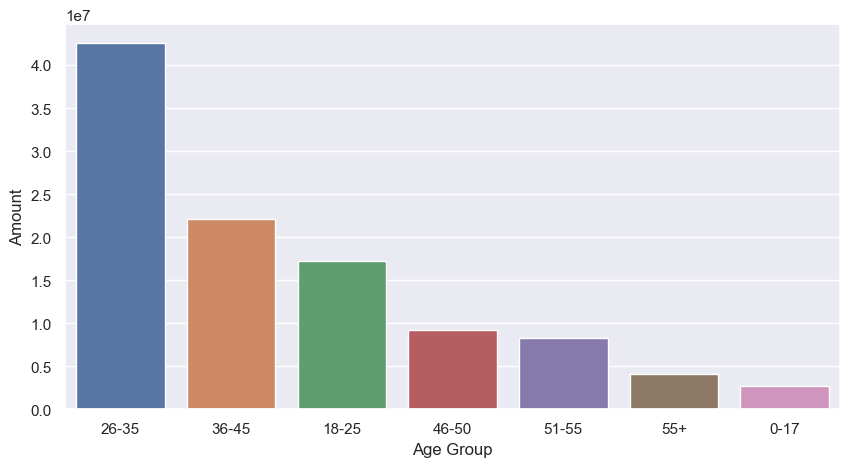

In [17]:
#Age Group vs Total Amount

a = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Age Group', y='Amount', data=a, hue='Age Group')

From the above graphs, it can be seen that most of the buyers are from the age group 26-35 yrs, majorly females.

<Axes: xlabel='State', ylabel='Orders'>

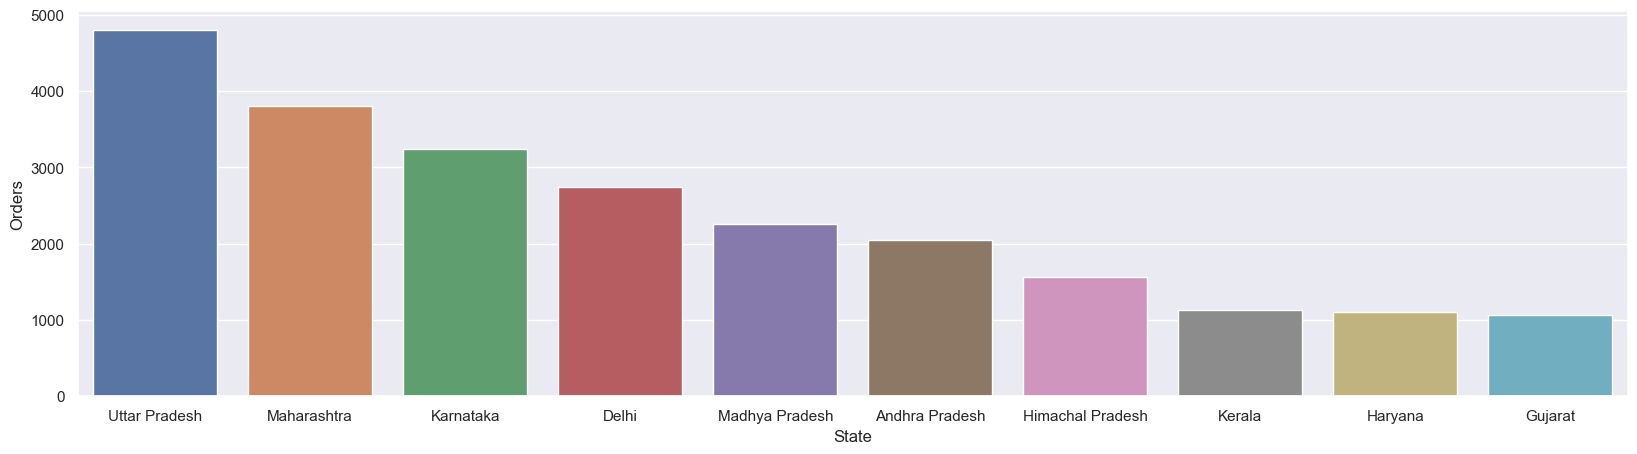

In [18]:
reg = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders',data=reg,hue='State')

<Axes: xlabel='State', ylabel='Amount'>

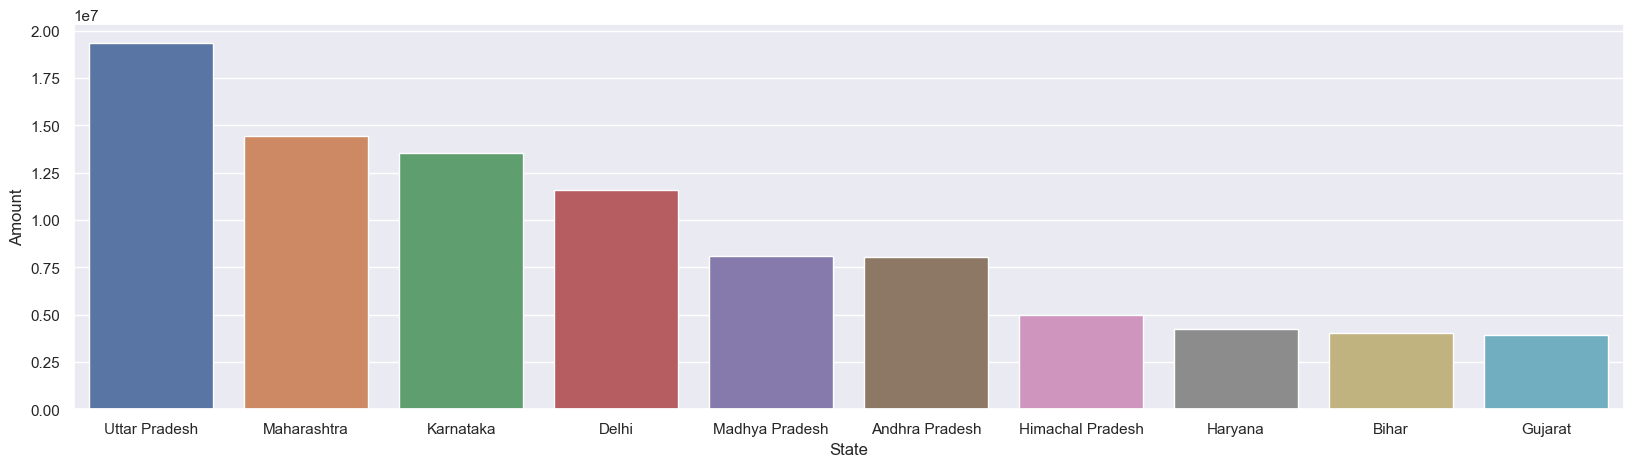

In [19]:
reg = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=reg,hue='State')

From the above, it is clear that the top 3 states having the highest order values and orders are Uttar Pradesh, Maharashtra and Karnataka respectively.

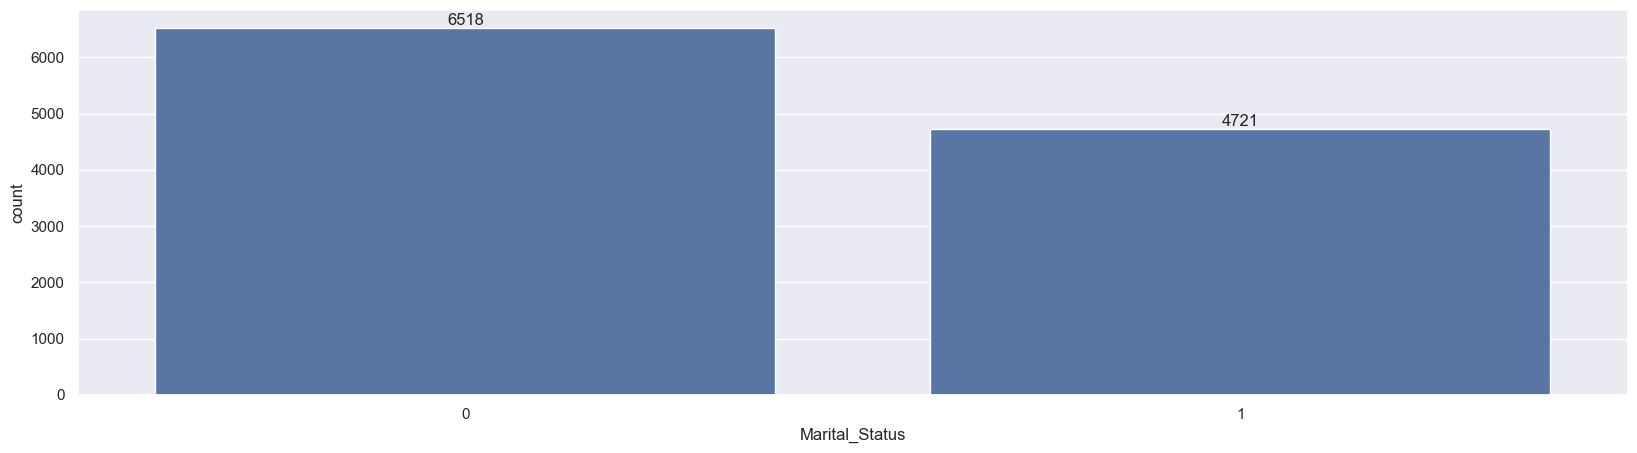

In [20]:
mx = sns.countplot(x='Marital_Status',data=df)
for bars in mx.containers:
    mx.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

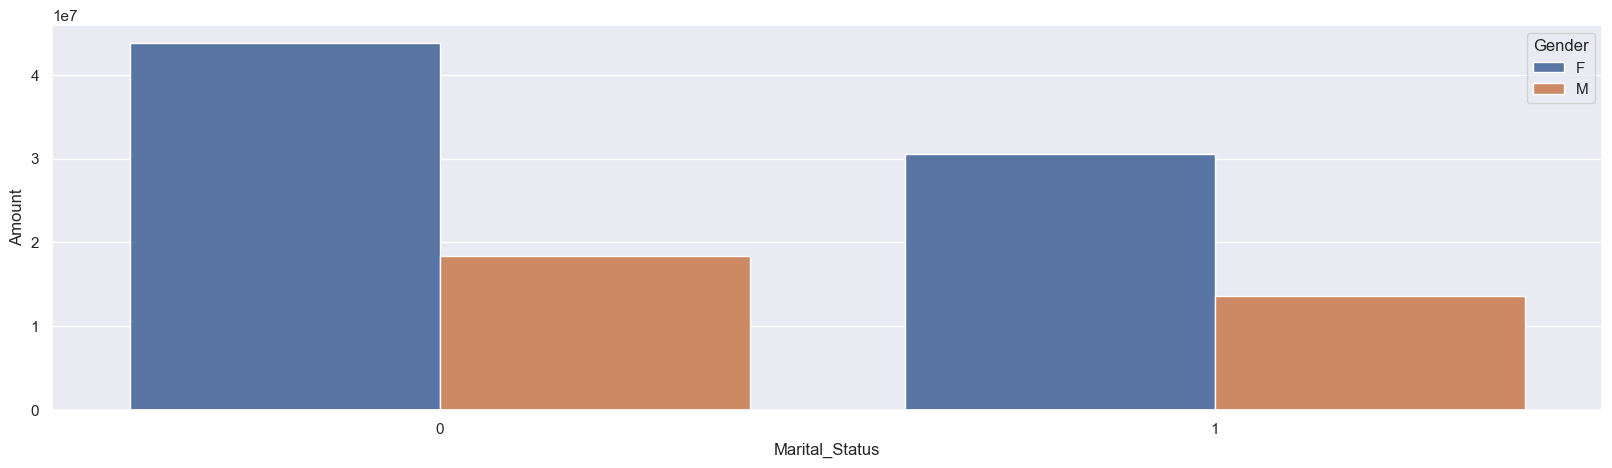

In [21]:
p1 = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Marital_Status',y='Amount',data=p1,hue='Gender')

From the above graphs, we can see that most of the buyers are married(women) and have high purchasing power.

<Axes: xlabel='Occupation', ylabel='count'>

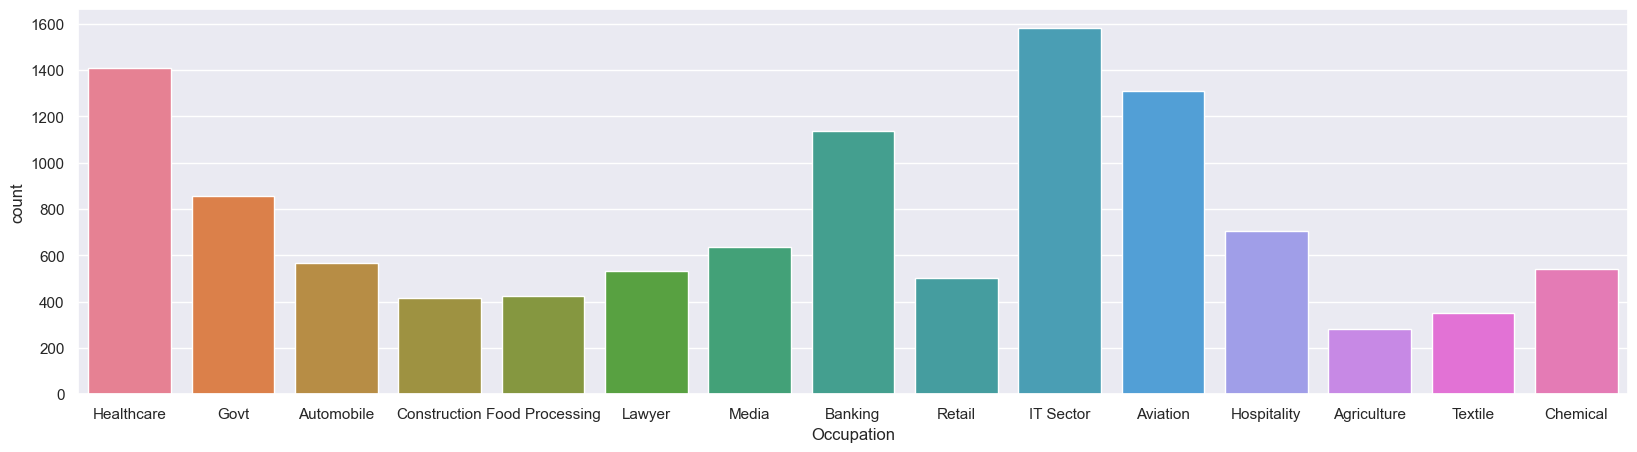

In [22]:
bx = sns.countplot(x='Occupation',data=df,hue='Occupation')
bx

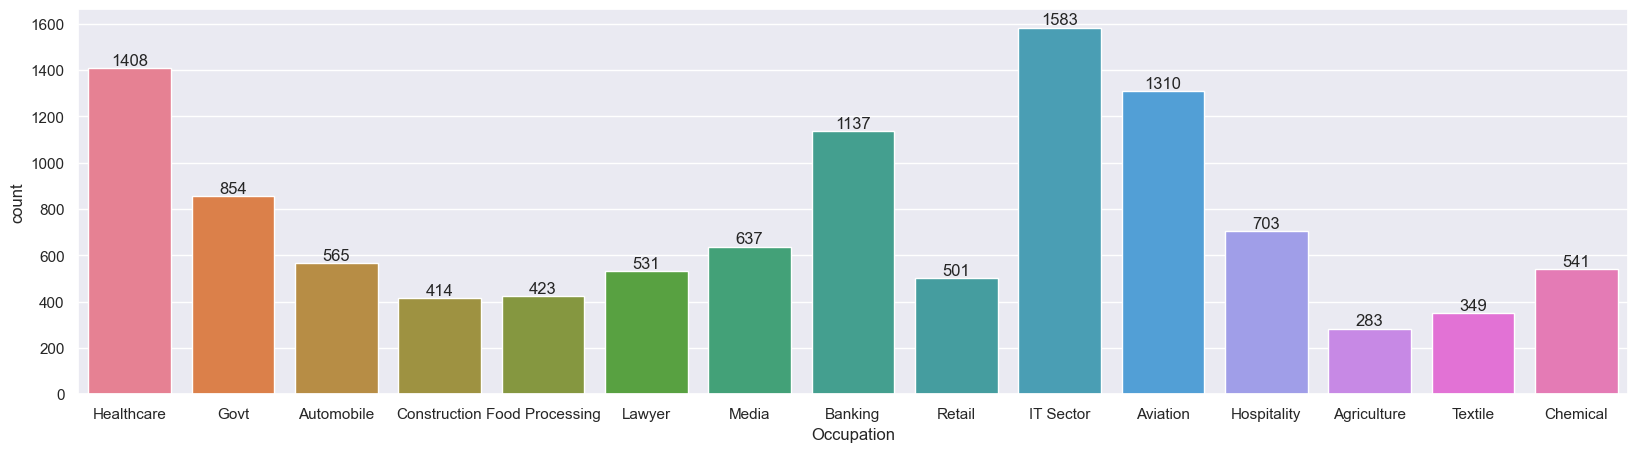

In [23]:
bx = sns.countplot(x='Occupation',data=df,hue='Occupation')
for bars in bx.containers:
    bx.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

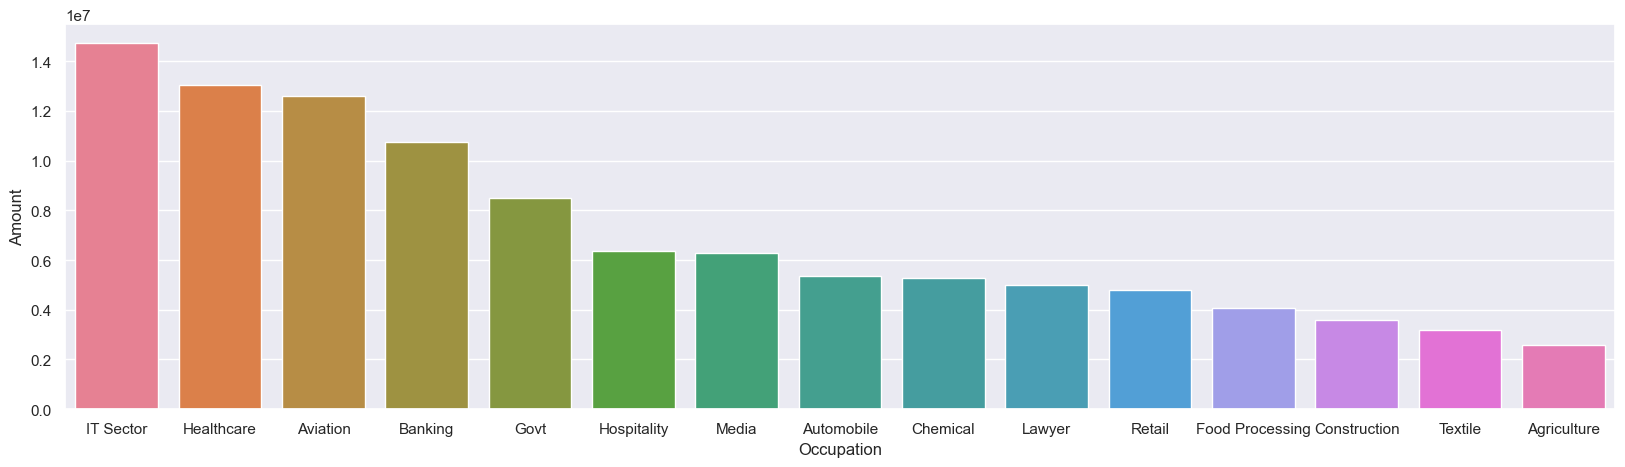

In [24]:
n1 = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=n1,hue='Occupation')

<Axes: xlabel='Occupation', ylabel='Amount'>

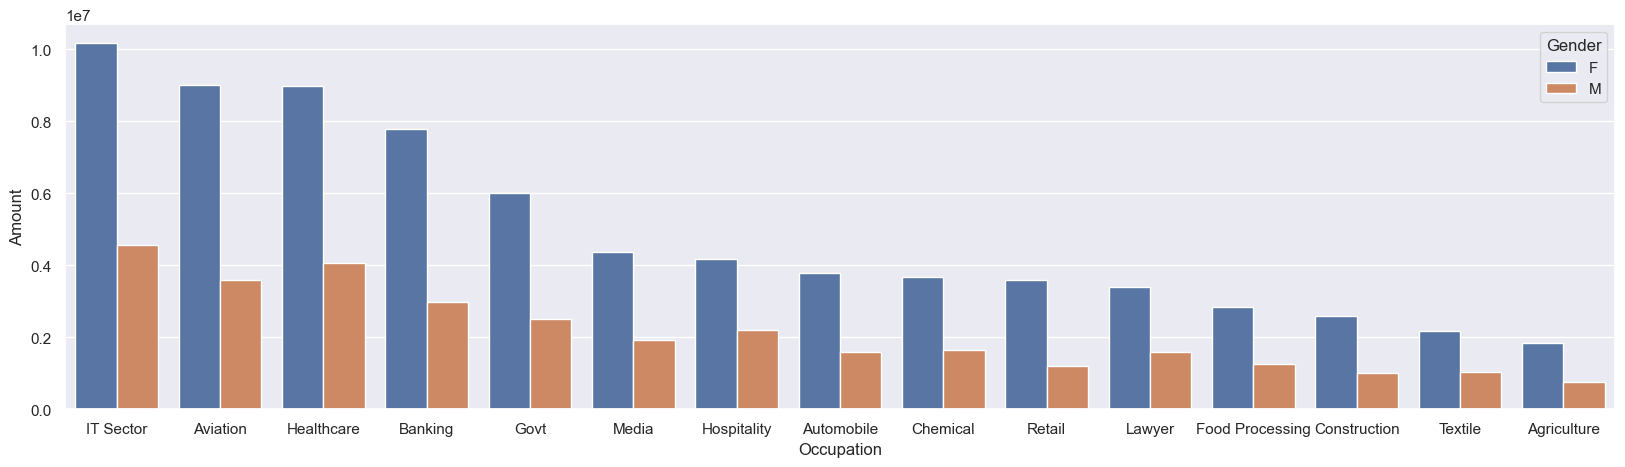

In [25]:
n1 = df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=n1,hue='Gender')

From the above graphs, it is indicated that most of the buyers are in IT, Healthcare and Aviation sector and are majorly women.

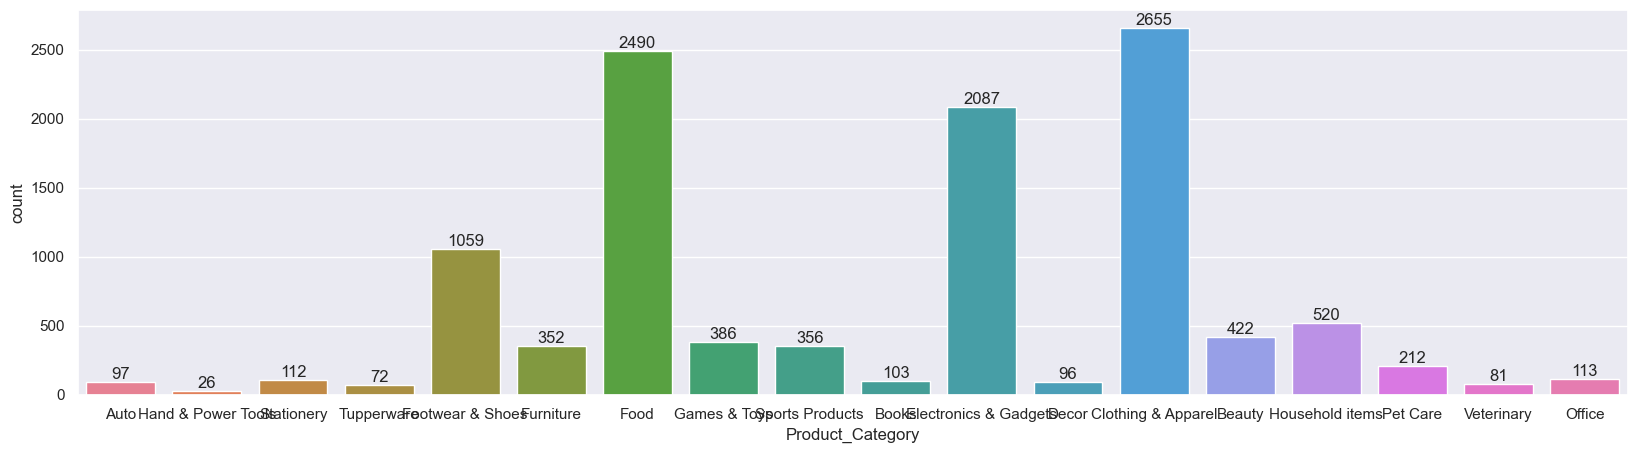

In [26]:
cx = sns.countplot(x='Product_Category',data=df,hue='Product_Category')
sns.set(rc={'figure.figsize':(34,10)})
for bars in cx.containers:
    cx.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

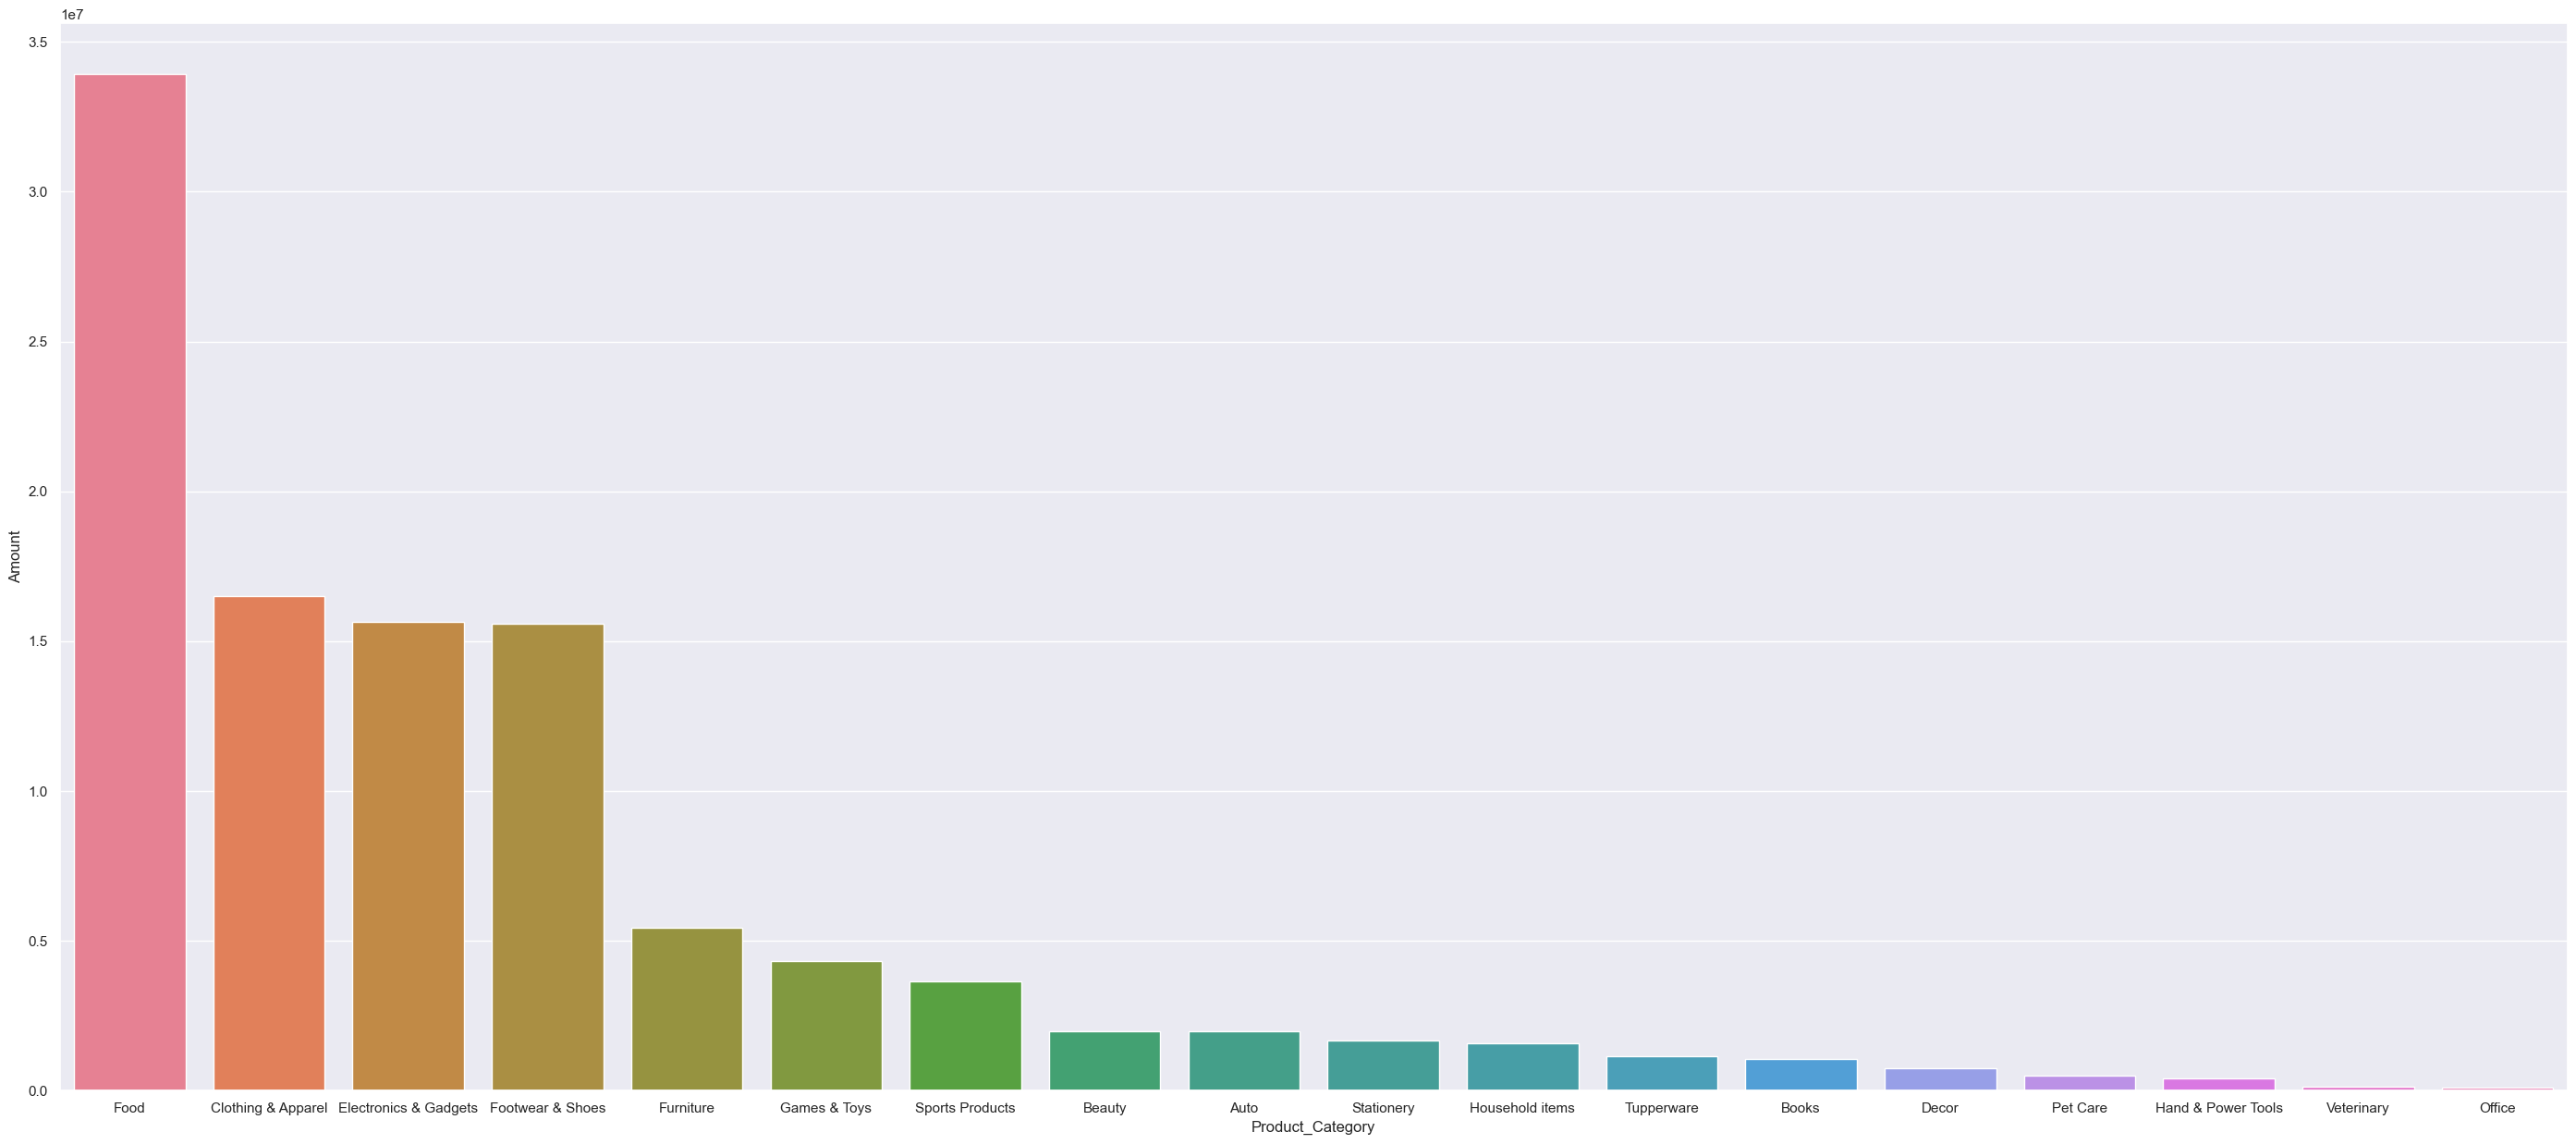

In [27]:
q1 = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(35,15)})
sns.barplot(x='Product_Category',y='Amount',data=q1,hue='Product_Category')

<Axes: xlabel='Product_ID', ylabel='Orders'>

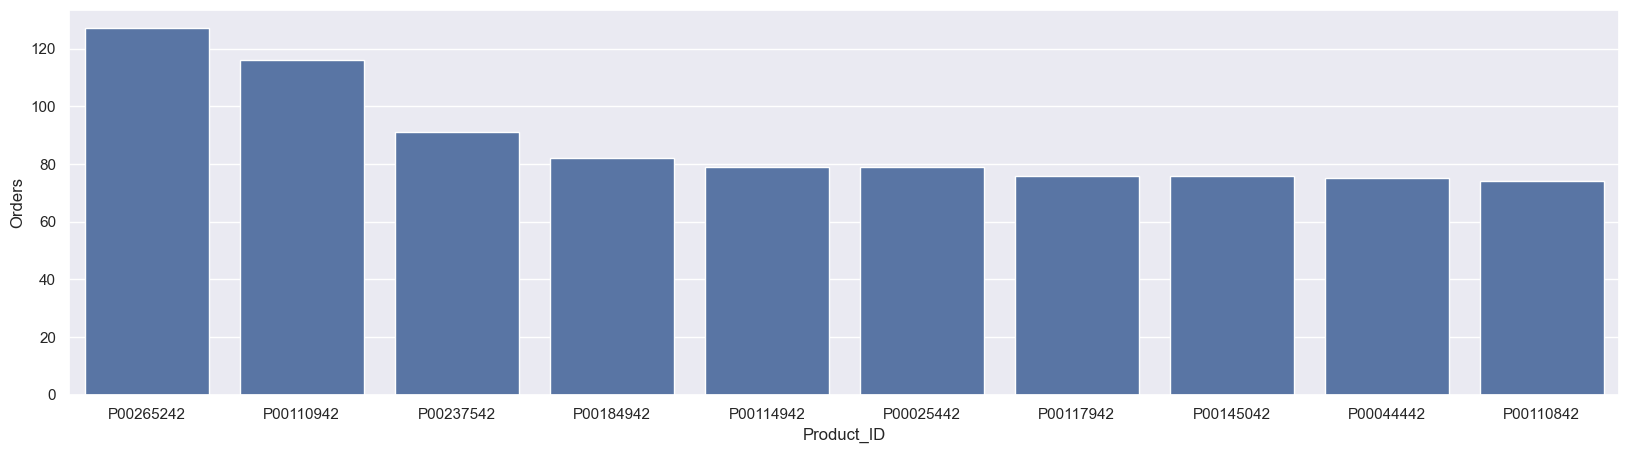

In [28]:
# top 10 most sold products

dx = df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID',y='Orders',data=dx)

Conclusion: Married women in age group 26-35 years from UP,Maharashtra and Karnataka working in IT, Healthcare and Aviation sector are most likely to purchase from Food, Clothing and Electronics category. 